<p align="center">
    <img src="https://github.com/alek-07/CC-AI/blob/main/escudo.png?raw=true" width="420" height="440" />

</p>

## Actividad: Campaña de medidas vehiculares (Vehículo a infraestructura Garcia Roel)

**Introduction:**

La reciente campaña de medidas en el entorno vehicular se llevó a cabo mediante la emulación de un enlace entre un vehículo y la infraestructura (RSU), utilizando la carretera García Roel ubicada a un lado de nuestra universidad. Esta iniciativa tiene como objetivo principal emular una infraestructura inteligente que podría representar elementos como parquímetros, cruces peatonales, semáforos, entre otros.

Durante el estudio, el vehículo transitó por la carretera desde un extremo hasta el otro, estableciendo y manteniendo un enlace continuo con la infraestructura. Es importante señalar que el sentido de dirección en el que se desplaza el vehículo con respecto a la infraestructura se deja sin determinar por el momento, lo cual se convierte en un ejercicio valioso para el análisis y la comprensión de los resultados obtenidos.

Esta iniciativa busca proporcionar insights valiosos sobre la interacción entre vehículos y la infraestructura inteligente, contribuyendo así al avance de tecnologías que promueven la seguridad y eficiencia en el entorno vial. Algunas imagenes de los materiales y elementos utilizados en esta campaña se pueden ver a continuación:

**poner imagenes**

La frecuencia de transmisión seleccionada para este experimento se sitúa en los 28 GHz, en el contexto de las bandas milimétricas New Radio (NR) de las recomendaciones 3GPP. Este rango de frecuencia es conocido por su capacidad para proporcionar tasas de transferencia de datos significativamente altas, lo que resulta fundamental para aplicaciones que demandan un ancho de banda amplio.

El transmisor utilizado se encuentra a una altura aproximada de 1.5 metros sobre el nivel de la acera. Esta ubicación específica permite caracterizar la locacion de posibles infraestructuras a los laterales de la vía.

Para llevar a cabo la transmisión, se implementó una antena omnidireccional polarizada verticalmente, con una ganancia de 3 dBi. Esta antena es esencial para garantizar la cobertura en todas las direcciones, lo que resulta crucial en entornos dinámicos y móviles. En el proceso de transmisión, la antena recibe un tono sinusoidal proveniente de un generador de señales. Este generador de señales, a su vez, proporciona la portadora sinusoidal que será transmitida. Para ajustar la frecuencia a los 28 GHz, se emplea un Up-Converter que duplica la frecuencia de la señal de salida del generador (14GHz), ya que el máximo posible esta limitado a los 20GHz, con una ganancia específica de 24 dB. Los equipos especificos utilizados ya han sido cubiertos en previas presentaciones y el esquema de conexion empleado puede verse en la siguiente figura:


**poner imagenes**


El sistema de recepción, en contraste con su homólogo de transmisión, está equipado con una antena omnidireccional, sin embargo, a diferencia de la antena de transmisión, esta antena receptora incorpora un sistema de amplificación de bajo ruido, comúnmente conocido como LNA (Low Noise Amplifier). La presencia de este LNA resulta crucial para mitigar la degradación de la señal durante la etapa de recepción, asegurando así una señal más limpia y confiable. La ganancia total del sistema de recepción, considerando la antena y el LNA, se estima en 30 dBi. Esta ganancia adicional contribuye significativamente a mejorar la sensibilidad del sistema, permitiendo la captura de señales débiles y mejorando la relación señal-ruido.

La salida de la antena, ya amplificada por el LNA, es dirigida hacia un Analizador Espectral. Este dispositivo es responsable de analizar la distribución de las frecuencias presentes en la señal recibida. La capacidad del Analizador Espectral para descomponer la señal en sus componentes frecuenciales permite un análisis detallado y preciso de la información transmitida. Es importante destacar que los datos obtenidos durante este proceso de análisis son registrados a una frecuencia aproximada de 50 milisegundos por barrido. Este intervalo de tiempo entre barridos garantiza una captura continua y detallada de la información, proporcionando así una visión dinámica de las variaciones en las características de la señal a lo largo del tiempo. Un esquema general del sistema empleado en recepción se pude ver en la siguiente figura:

**poner imagenes**



Otros datos especificos del experimento son:
- Potencia total de transmisión -> 57 dBm
- Velocidad media (considerar constante) -> 8.33 m/s







# VEHICLE TO INFRAESTRUCTURE MEASUREMENT CAMPAIGN

- Description of the measurements campaign and some pictures
- Equipment and setup
- Intro to RF propagation theory and large scale phenomena like Shadow Fading


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 

csv_file_path = "https://raw.githubusercontent.com/alek-07/CC-AI/main/data1.csv"
df = pd.read_csv(csv_file_path)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%b.%d.%Y %I:%M:%S.%f %p')
df['DateTime'] = (df['DateTime'] - df['DateTime'].iloc[0]).dt.total_seconds()
df.head()


,DateTime,27999980000,27999980025,27999980050,27999980075,27999980100,27999980125,27999980150,27999980175,27999980200,...,27999989775,27999989800,27999989825,27999989850,27999989875,27999989900,27999989925,27999989950,27999989975,27999990000
0,0.000,-111.205,-114.362,-118.458,-120.998,-120.363,-115.665,-112.899,-113.822,-112.679,...,-109.906,-110.031,-111.182,-114.327,-115.825,-113.749,-110.593,-108.468,-107.020,-107.406
1,0.153,-112.167,-118.447,-131.408,-116.370,-113.675,-114.887,-109.387,-104.360,-103.771,...,-104.564,-104.036,-103.900,-104.334,-105.655,-108.842,-113.354,-111.954,-107.967,-106.859
2,0.205,-107.755,-108.983,-110.428,-110.910,-111.548,-113.160,-113.866,-112.746,-111.257,...,-118.257,-122.288,-120.560,-117.561,-116.602,-118.128,-116.912,-117.231,-115.490,-111.917
3,0.256,-114.708,-117.426,-121.794,-122.002,-114.431,-111.214,-116.052,-119.748,-113.899,...,-110.357,-106.124,-103.310,-101.948,-102.596,-106.114,-112.102,-112.907,-109.462,-108.124
4,0.307,-108.704,-110.143,-110.848,-110.958,-109.076,-106.979,-106.289,-107.762,-110.135,...,-123.150,-123.854,-129.578,-125.516,-117.386,-113.236,-111.724,-113.120,-116.637,-113.743


### Ploting the evolution of the spectogram to see the doppler effect

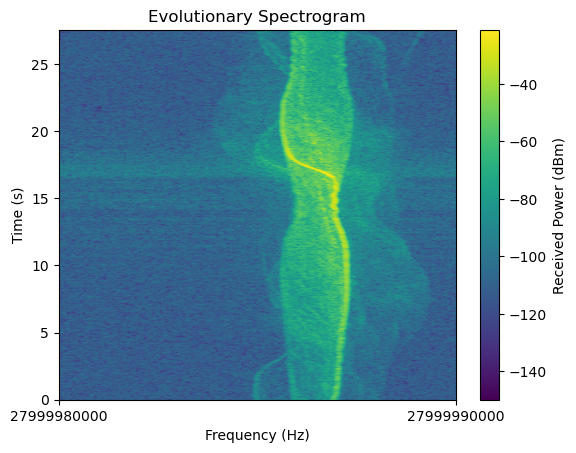

In [212]:
time_values = df['DateTime'].values
frequency_values = df.columns[1:].values  
power_values = df.iloc[:, 1:].values  

# Create a 2D plot
plt.imshow(power_values, extent=[frequency_values.min(), frequency_values.max(), time_values.min(), time_values.max()],
           origin='lower', cmap='viridis', aspect='auto')

# labels
plt.ylabel('Time (s)')
plt.xlabel('Frequency (Hz)')
plt.title('Evolutionary Spectrogram')
plt.colorbar(label='Received Power (dBm)')


plt.show()


### Calculating the RSSI and converting time to distance traveled (assuming constant velocity of 8.33 m/s)




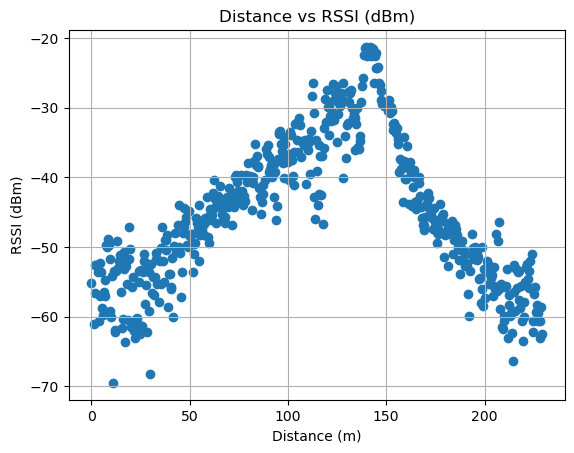

In [213]:
RxPw=np.max(power_values, axis=1)
distance = time_values*8.33

# Plot distance vs RSSI_dBm 
plt.scatter(distance, RxPw)
plt.xlabel('Distance (m)')
plt.ylabel('RSSI (dBm)')
plt.title('Distance vs RSSI (dBm)')
plt.grid(True)
plt.show()


#### Now assuming the peak received power is when the vehicle is in front of the transmitter

Lets estimate the Path Loss and fit a CI model


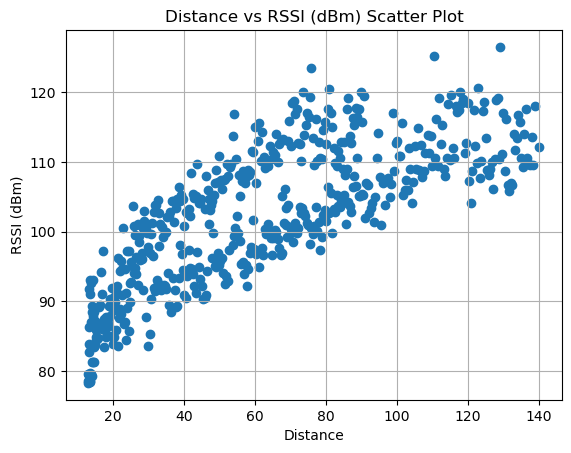

In [215]:
#find the max position
max_position = np.argmax(RxPw)
rel_pos=distance-distance[max_position]
rel_pos = np.column_stack((rel_pos, np.full_like(rel_pos, 13)))
tx_distance = np.linalg.norm(rel_pos, axis=1)

path_loss=57-RxPw

# Define a moving average
def simple_moving_average(data, window_size):
    moving_averages = []

    for i in range(len(data)):
        start_index = max(0, i - window_size + 1)
        window = data[start_index : i + 1]
        average = sum(window) / len(window)
        moving_averages.append(average)

    return moving_averages

window_size=3;
path_loss_avg=simple_moving_average(path_loss, window_size)


path_loss_slice=path_loss[max_position:]
tx_distance_slice=tx_distance[max_position:]


# Plot distance vs path loss scatter plot
plt.scatter(tx_distance,path_loss)
plt.xlabel('Distance')
plt.ylabel('RSSI (dBm)')
plt.title('Distance vs RSSI (dBm) Scatter Plot')
plt.grid(True)
plt.show()



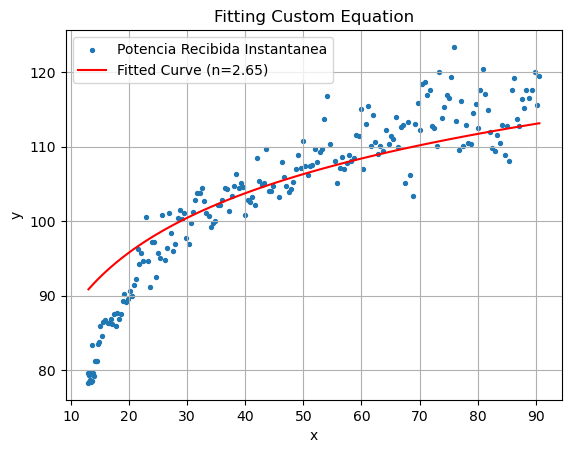

In [216]:
# Define the CI model
def ci_equation(x, n):
    return 61.38 + 10 * n * np.log10(x)


# Fit the model
params, covariance = curve_fit(ci_equation, tx_distance_slice, path_loss_slice)
estimated_n=params[0]

# Generate values for the fitted curve
x_fit = np.linspace(min(tx_distance_slice), max(tx_distance_slice), 100)
y_fit = ci_equation(x_fit, estimated_n)

# Plot the original data and the fitted curve
plt.scatter(tx_distance_slice, path_loss_slice, label='Potencia Recibida Instantanea', s=8)
plt.plot(x_fit, y_fit, color='red', label=f'Fitted Curve (n={estimated_n:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting Custom Equation')
plt.legend()
plt.grid(True)
plt.show()

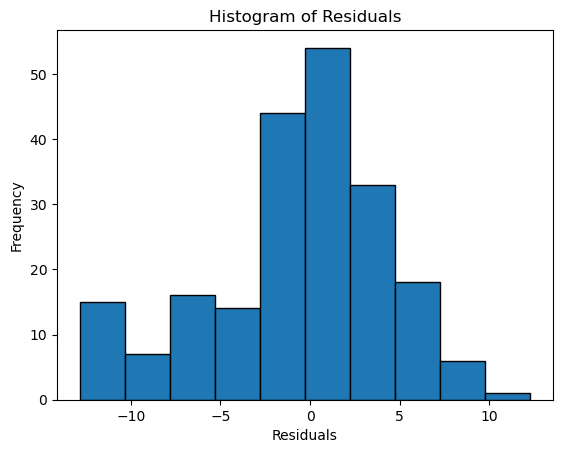

5.021962715579538

In [217]:
# Calculate residuals
residuals = path_loss_slice - ci_equation(tx_distance_slice, estimated_n)

# Calculate the variance of residuals
residual_std = np.std(residuals)

# Plot histogram of residuals
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

residual_std

### Make a spatial average to remove the small-scale fading

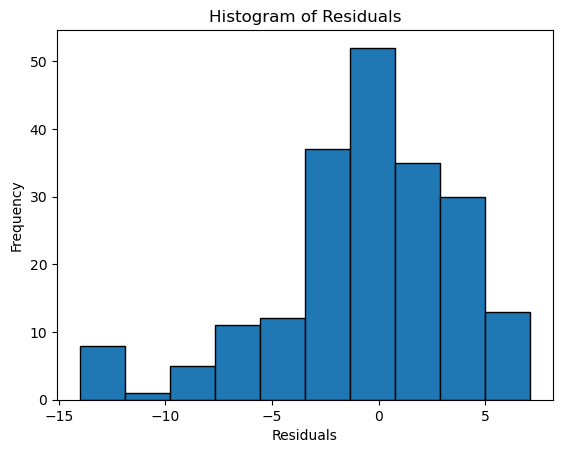

4.314182783713715

In [208]:

# Define a moving average
def simple_moving_average(data, window_size):
    moving_averages = []

    for i in range(len(data)):
        start_index = max(0, i - window_size + 1)
        window = data[start_index : i + 1]
        average = sum(window) / len(window)
        moving_averages.append(average)

    return moving_averages

window_size=3;
path_loss_avg=simple_moving_average(path_loss_slice, window_size)

# Calculate residuals
shadow_fading = path_loss_avg - ci_equation(tx_distance_slice, estimated_n)

# Calculate the variance of residuals
SF_std = np.std(shadow_fading)

# Plot histogram of residuals
plt.hist(shadow_fading, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

SF_std


In [ ]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging


del_i=381

posx= np.delete(rel_pos[:, 0], del_i)
posy=np.delete(rel_pos[:, 1], del_i)
path_l=np.delete(residuals, del_i)



OK = OrdinaryKriging(
    posx,
    posy,
    path_l,
    variogram_model="exponential",
    verbose=False,
    enable_plotting=False,
    nlags=20,
    #variogram_parameters=[42, 8, 22],
)

OK.display_variogram_model()

z, ss = OK.execute("points", rel_pos[del_i, 0], rel_pos[del_i, 1])

In [ ]:
distance_infer = np.linalg.norm(np.array([rel_pos[del_i, 0], rel_pos[del_i, 1]]))
print("Real Value:", path_loss_slice[del_i])
print("Interpolated Value:", 61.38 + 10 * estimated_n * np.log10(distance_infer)+z)
print("Standard deviation using CI:", residual_std)
print("Standard deviation using kriging:", np.sqrt(ss))

In [ ]:
np.linalg.norm(np.array([rel_pos[del_i, 0], rel_pos[del_i, 1]]))

In [ ]:
autocorrelation = np.correlate(residuals, residuals, mode='full')
autocorrelation /= np.max(autocorrelation)

# Plot the spatial series
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(residuals, marker='o')
plt.title('Spatial Series')
plt.xlabel('Spatial Index')
plt.ylabel('Value')

# Plot the autocorrelation
plt.subplot(2, 1, 2)
lags = np.arange(20, 20)
plt.stem(lags, autocorrelation, basefmt='b', linefmt='b-', markerfmt='bo')
plt.title('Autocorrelation of Spatial Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()